# End-to-End Data Science Workflow Demo
This notebook generates a synthetic dataset (6500+ rows, 20 columns) with mixed types and intentional data quality issues, then walks through:
1. Data Wrangling & Cleaning
2. Exploratory Data Analysis (EDA)
3. Predictive Modeling (Regression & Classification)
4. Deployment with Gradio (two mini apps)

*Targets*
- Regression target: monthly_spend


*How to use*: Run cells from top to bottom in Google Colab.

***IMPORT FILE***

In [19]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv')
df.head()

,customer_id,signup_date,country,city,gender,age,membership_tier,tenure_months,avg_session_length,sessions_per_month,...,clicks_per_session,device_per_session,referral_per_month,loyalty_score,engagement_index,referral_value_score,discount_sensitivity,mobile_loyalty_flag,signup_month,signup_dayofweek
0,100000,2025-02-24,malaysia,kuala lumpur,other,39,standard,8,21.51,21,...,0.014999,0.095234,0.000000,55.2,3116.799,0.0,0.0,1,2,0
1,100001,2021-04-24,philippines,cebu,male,51,basic,55,19.60,16,...,0.013999,0.124992,0.000000,313.5,1787.520,0.0,0.0,0,4,5
2,100002,2019-05-29,thailand,phuket,female,29,standard,78,31.98,18,...,0.002944,0.277762,0.000000,491.4,3626.532,0.0,0.0,1,5,2
3,100003,2018-01-01,indonesia,jakarta,female,43,standard,95,12.71,19,...,0.012157,0.157886,0.010526,693.5,1762.877,7.3,0.0,0,1,0
4,100004,2021-06-16,malaysia,shah alam,male,51,standard,53,3.00,15,...,0.002400,0.199987,0.000000,307.4,261.000,0.0,0.0,1,6,2


***FIND THE CORRELATION***

Correlation with 'monthly_spend':
monthly_spend           1.000000
engagement_index        0.197154
total_session_time      0.194575
avg_session_length      0.156168
sessions_per_month      0.127937
satisfaction_score      0.087524
customer_id             0.023859
mobile_loyalty_flag     0.019577
is_mobile_user          0.018138
num_devices             0.011524
signup_month            0.009749
loyalty_score           0.004969
email_click_rate       -0.001733
signup_dayofweek       -0.008014
support_tickets        -0.010011
age                    -0.013286
complaint_rate         -0.015746
discount_sensitivity   -0.016095
churn                  -0.016183
referral_value_score   -0.019564
referral_per_month     -0.023383
tenure_months          -0.024303
referral_count         -0.029623
device_per_session     -0.049267
discount_rate          -0.050182
clicks_per_session     -0.053053
Name: monthly_spend, dtype: float64


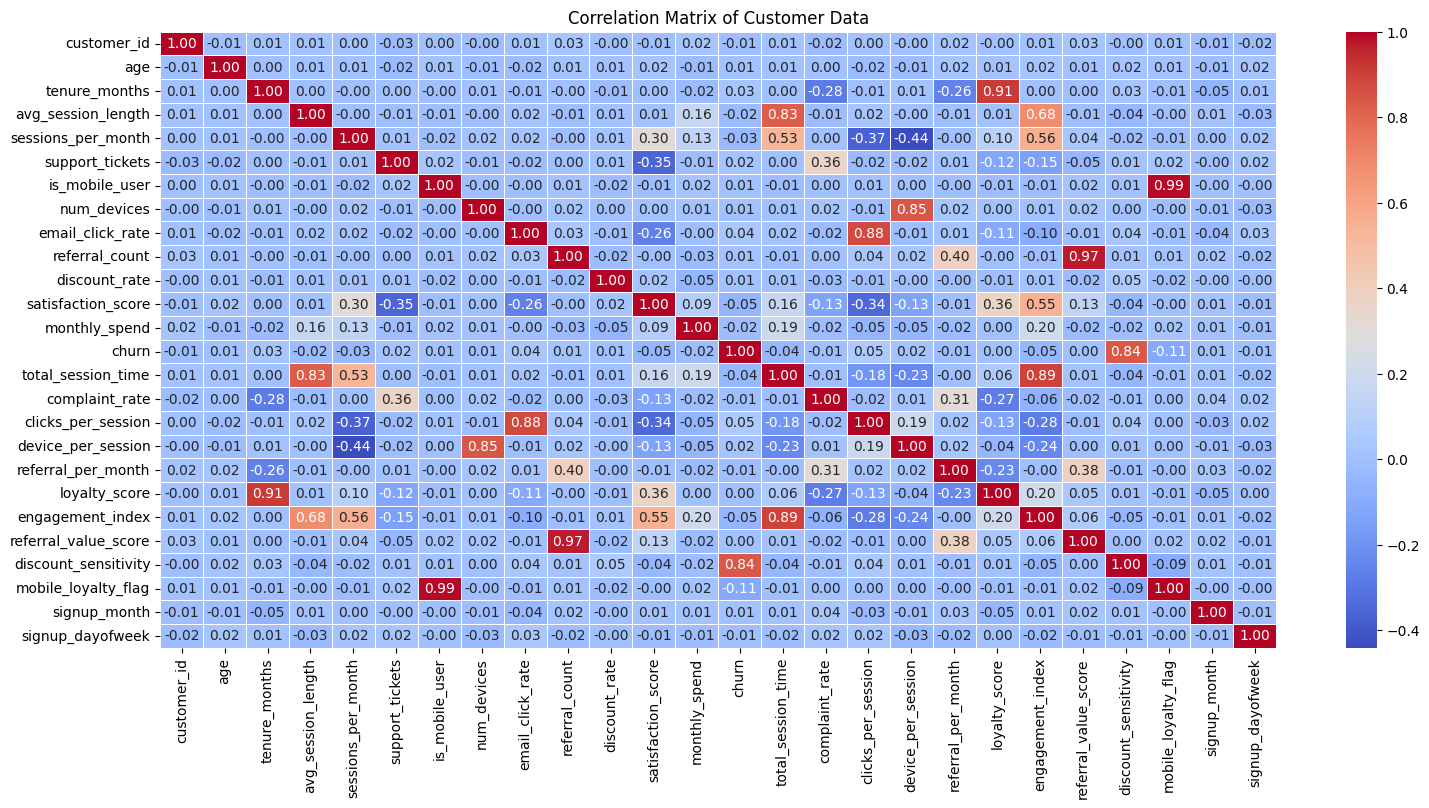

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlations with 'monthly_spend'
print("Correlation with 'monthly_spend':")
print(correlation_matrix['monthly_spend'].sort_values(ascending=False))

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Customer Data')
plt.show()

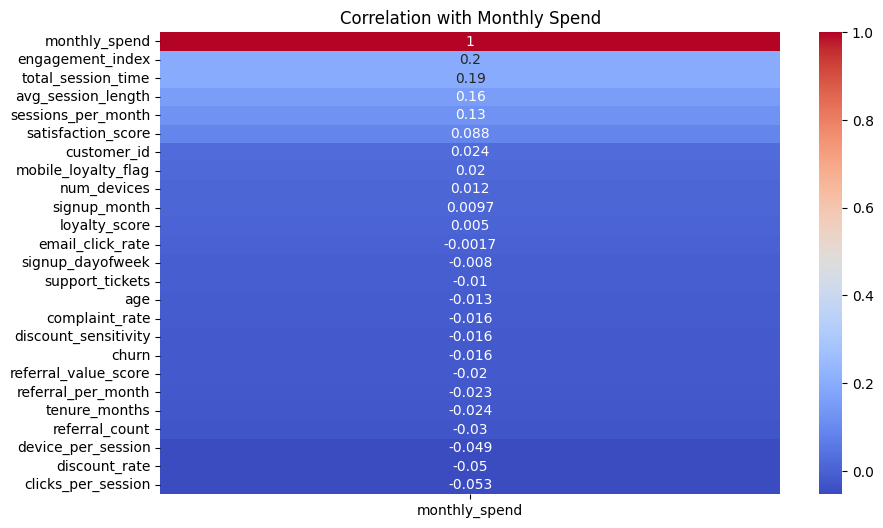

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr()[['monthly_spend']].sort_values(by='monthly_spend', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Monthly Spend")
plt.show()

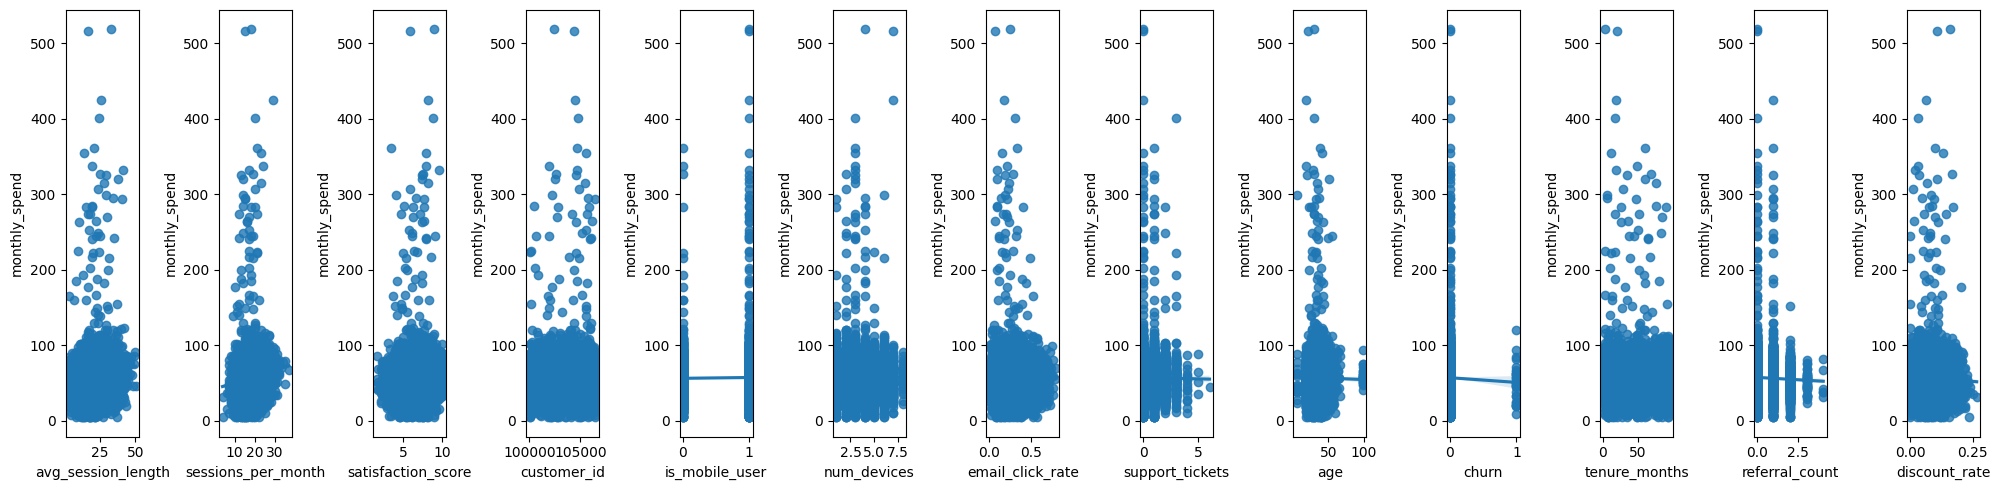

In [22]:
def reg_plot(x, y, data, ax):
  sns.regplot(x=x, y=y, data=data, ax=ax)
  ax.set_xlabel(x)
  ax.set_ylabel(y)

x = ['avg_session_length', 'sessions_per_month', 'satisfaction_score', 'customer_id', 'is_mobile_user', 'num_devices', 'email_click_rate', 'support_tickets', 'age', 'churn', 'tenure_months', 'referral_count', 'discount_rate' ]
y = 'monthly_spend'

# Create a figure with subplots
fig, axes = plt.subplots(1, len(x), figsize=(20, 5))

for i, x in enumerate(x):
  reg_plot(x, y, df, axes[i])

plt.tight_layout()
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           6507 non-null   int64  
 1   signup_date           6507 non-null   object 
 2   country               6507 non-null   object 
 3   city                  6507 non-null   object 
 4   gender                6507 non-null   object 
 5   age                   6507 non-null   int64  
 6   membership_tier       6507 non-null   object 
 7   tenure_months         6507 non-null   int64  
 8   avg_session_length    6507 non-null   float64
 9   sessions_per_month    6507 non-null   int64  
 10  support_tickets       6507 non-null   int64  
 11  last_payment_method   6507 non-null   object 
 12  is_mobile_user        6507 non-null   bool   
 13  num_devices           6507 non-null   int64  
 14  email_click_rate      6507 non-null   float64
 15  referral_count       

***MODELING***

**1. SIMPLE LINEAR REGRESSION**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

feature = ['avg_session_length'] # select the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear1 = LinearRegression()

# training
model_linear1.fit(X_train, y_train)

# predict
y_pred = model_linear1.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 2.019648856507239
MSE: 930.5083326421594
MAE: 15.774182162946188
RMSE: 30.504234667372977


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

feature = ['sessions_per_month'] # select the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear2 = LinearRegression()

# training
model_linear2.fit(X_train, y_train)

# predict
y_pred = model_linear2.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 1.6018307684564248
MSE: 934.4763038519229
MAE: 15.810621080862093
RMSE: 30.56920515571059


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

feature = ['engagement_index'] # select the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear3 = LinearRegression()

# training
model_linear3.fit(X_train, y_train)

# predict
y_pred = model_linear3.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 4.020141877344918
MSE: 911.5098762827225
MAE: 15.508291556716651
RMSE: 30.191221841500926


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

feature = ['total_session_time'] # select the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear3 = LinearRegression()

# training
model_linear3.fit(X_train, y_train)

# predict
y_pred = model_linear3.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 3.5369665522753446
MSE: 916.0985377934971
MAE: 15.521252581273055
RMSE: 30.267119747235565


**2. MULTIPLE LINEAR REGRESSION**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

feature = ['avg_session_length', 'sessions_per_month', 'engagement_index','total_session_time'] # select all the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Step 1: Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multilinear = LinearRegression()

# training
model_multilinear.fit(X_train, y_train)

# predict
y_pred = model_multilinear.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 3.917677020159771
MSE: 912.4829734629332
MAE: 15.466819457317815
RMSE: 30.20733310742498


**3. RANDOM FOREST**

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor()

# training
model_RF.fit(X_train, y_train)

# predict
y_pred = model_RF.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: -5.268722382158142
MSE: 999.7251714248197
MAE: 16.891709871131773
RMSE: 31.61843088176293


**4.DECISION TREE**

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()

# training
model_DT.fit(X_train, y_train)

# predict
y_pred = model_DT.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: -67.09074745523836
MSE: 1586.841963719906
MAE: 23.12455251486766
RMSE: 39.835184996682344


**5.SVR**

In [31]:
from sklearn.svm import SVR

model_SVM = SVR(kernel='linear')

# training
model_SVM.fit(X_train, y_train)

# predict
y_pred = model_SVM.predict(X_test) # which later can be used to compare y_pred with y_test

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 3.979635339632559
MSE: 911.8945622981119
MAE: 15.490696065298746
RMSE: 30.197591995026887


**6.RIDGE REGRESSION**

In [32]:
from sklearn.linear_model import Ridge

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
model_ridge = Ridge()

# training
model_ridge.fit(X_train, y_train)

# predict
y_pred_ridge = model_ridge.predict(X_test)

# evaluation
print("Ridge Regression Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_ridge)*100)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", root_mean_squared_error(y_test, y_pred_ridge))
print("\n")

Ridge Regression Evaluation:
R2 Score: 3.917730579978196
MSE: 912.4824648113845
MAE: 15.466809965415461
RMSE: 30.207324688084917




**7.LASSO REGRESSION**

In [33]:
from sklearn.linear_model import Lasso

# Lasso Regression
model_lasso = Lasso()

# training
model_lasso.fit(X_train, y_train)

# predict
y_pred_lasso = model_lasso.predict(X_test)

# evaluation
print("Lasso Regression Evaluation:")
print("R2 Score:", r2_score(y_test, y_pred_lasso)*100)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lasso))

Lasso Regression Evaluation:
R2 Score: 4.018231536342077
MSE: 911.5280185755455
MAE: 15.464998871512993
RMSE: 30.19152229642529


**8.POLYNOMIAL REGRESSION**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

feature = ['avg_session_length', 'sessions_per_month', 'engagement_index','total_session_time'] # select all the highest correlative
target = 'monthly_spend'

X = df[feature]
y = df[target]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2) # can adjust the degree
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_poly = LinearRegression()

# training
model_poly.fit(X_train_poly, y_train)

# predict
y_pred = model_poly.predict(X_test_poly)

# evaluation
print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 3.8834684039576683
MSE: 912.8078488287867
MAE: 15.50085037527051
RMSE: 30.212710054359352


Simple Linear Regression:
R2 Score: 4.020141877344918
MSE: 911.5098762827225
MAE: 15.508291556716651
RMSE: 30.191221841500926


Multiple Linear Regression:
R2 Score: 3.917677020159771
MSE: 912.4829734629332
MAE: 15.466819457317815
RMSE: 30.20733310742498


RandomForestRegressor:
R2 Score: -5.939313372608579
MSE: 1006.0936983501322
MAE: 16.814285621627402
RMSE: 31.71898009631035


DecisionTreeRegressor:
R2 Score: -59.31183530762034
MSE: 1512.966513307922
MAE: 22.623834079144366
RMSE: 38.89687022509551


Ridge:
R2 Score: 3.917730579978196
MSE: 912.4824648113845
MAE: 15.466809965415461
RMSE: 30.207324688084917


Lasso:
R2 Score: 4.018231536342077
MSE: 911.5280185755455
MAE: 15.464998871512993
RMSE: 30.19152229642529


Polynomial Regression:
R2 Score: 3.8834684039576683
MSE: 912.8078488287867
MAE: 15.50085037527051
RMSE: 30.212710054359352


The best model based on R2 Score is: Simple Linear Regression with R2 Score of 4.02%


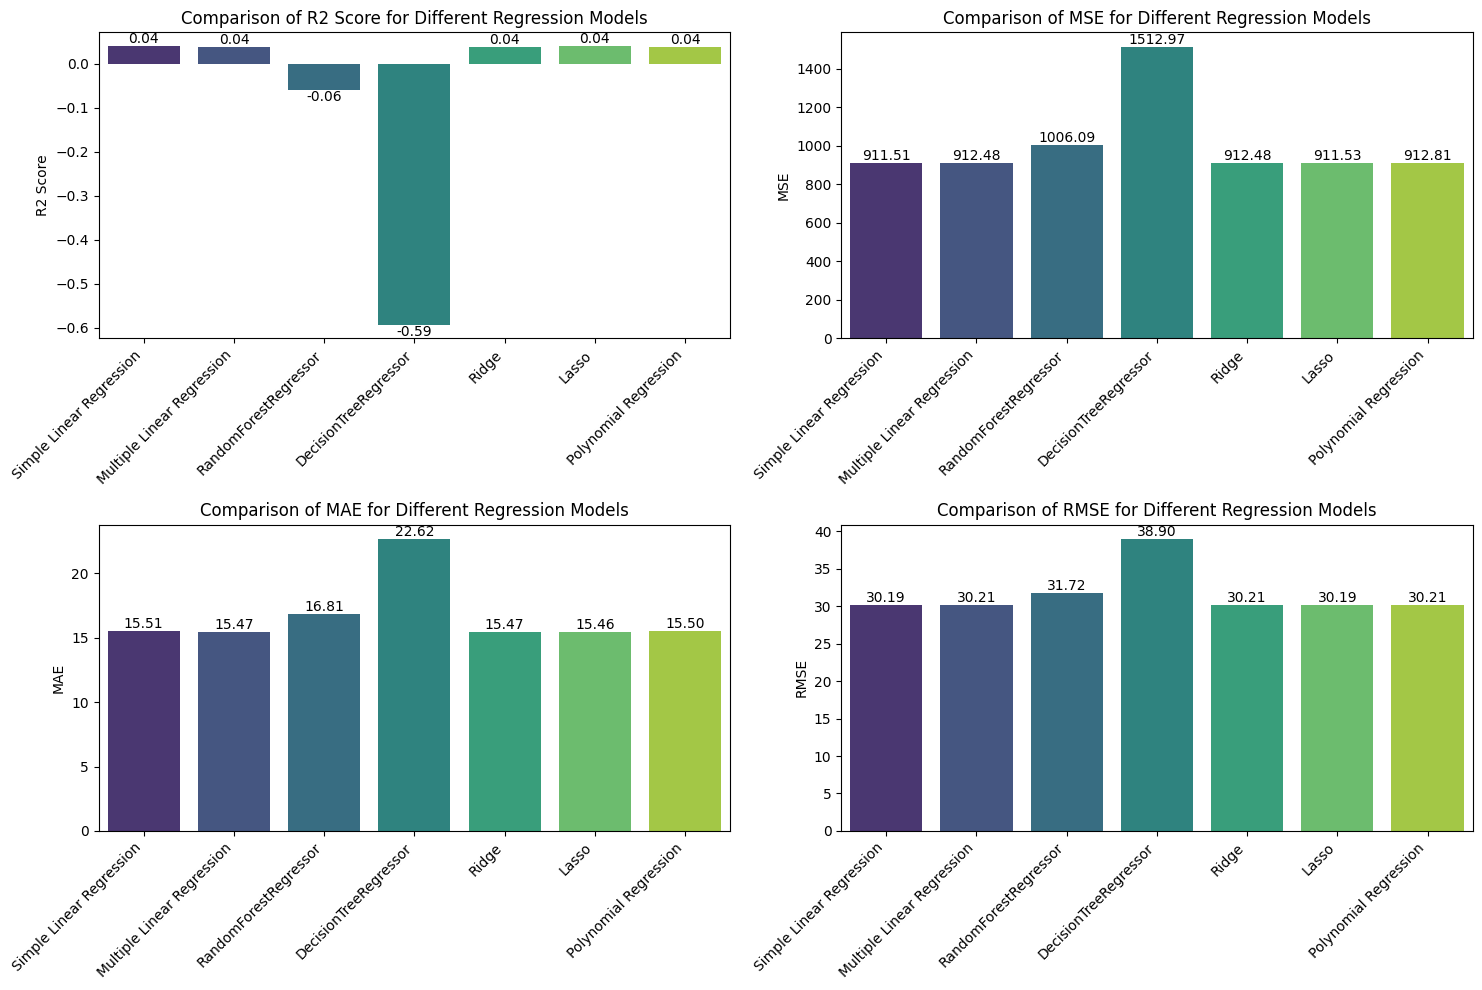

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Define the features and target
single_feature = ['engagement_index'] # Feature for Simple Linear Regression
multiple_features = ['avg_session_length', 'sessions_per_month', 'engagement_index','total_session_time'] # Features for other models
target = 'monthly_spend'

models = {
    'Simple Linear Regression': LinearRegression, # Store the class, not an instance
    'Multiple Linear Regression': LinearRegression,
    'RandomForestRegressor': RandomForestRegressor,
    'DecisionTreeRegressor': DecisionTreeRegressor,
    'Ridge': Ridge,
    'Lasso': Lasso,
    'Polynomial Regression': PolynomialFeatures # Store the class
}

results = {}

for name, model_class in models.items(): # Iterate through model classes
    if name == 'Simple Linear Regression':
        X = df[single_feature]
    elif name == 'Polynomial Regression':
         X = df[multiple_features] # Polynomial features will be created from these
    else:
        X = df[multiple_features] # Use multiple features for other models


    y = df[target]
    # Split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if name == 'Polynomial Regression':
        # For polynomial regression, transform features and then use LinearRegression
        poly_features = model_class(degree=2) # Create an instance of PolynomialFeatures
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)
        model_instance = LinearRegression() # Use LinearRegression for prediction after transformation
        model_instance.fit(X_train_poly, y_train)
        y_pred = model_instance.predict(X_test_poly)
    else:
        model_instance = model_class() # Create a new instance of the model
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)


    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae, 'RMSE': rmse}
    print(f'{name}:')
    print(f'R2 Score: {r2*100}')
    print(f'MSE: {mse}')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print('\n')

# Find the best model based on R2 Score
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
print(f'The best model based on R2 Score is: {best_model_name} with R2 Score of {results[best_model_name]["R2 Score"]*100:.2f}%')

# Create a list of model names for plotting
model_names = list(results.keys())

# Create bar charts to compare the metrics
metrics = ['R2 Score', 'MSE', 'MAE', 'RMSE']
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    metric_values = [results[name][metric] for name in model_names]
    ax = sns.barplot(x=model_names, y=metric_values, palette='viridis')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for Different Regression Models')
    plt.xticks(rotation=45, ha='right')

    # Add numerical labels to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

***SAVE MODEL***

In [37]:
# save the best model
import joblib

joblib.dump(model_RF, "results/model_RF_reg.joblib")

['results/model_RF_reg.joblib']